<b>1. Cargar datos:</b> el primer paso es preparar el entorno y cargar el conjunto de datos

In [1]:
options(repr.plot.width=10, repr.plot.height=6)
library("vegan")
library("tidyr")
library("dplyr")

Warning message:
"package 'vegan' was built under R version 3.6.3"
Loading required package: permute

Warning message:
"package 'permute' was built under R version 3.6.3"
Loading required package: lattice

This is vegan 2.5-7


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




<b>2. Analizar el conjunto de datos:</b> hay un par de cosas que podemos hacer para familiarizarse con los datos una vez cargados. Podemos ver todo el conjunto de datos en la cuadrícula de vista como se muestra en la imagen a continuación o puede usar la función "head" para ver solo las 6 observaciones principales.

In [2]:
myTitanicDataSet<- read.csv('titanic_data.csv', stringsAsFactors = F, sep = ';')
head(myTitanicDataSet)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q


In [3]:
summary(myTitanicDataSet)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :0.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.302                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                  NA's   :16                        
     Age                SibSp           Parch           Ticket         
 Length:891         Min.   :0.000   Min.   :0.0000   Length:891        
 Class :character   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :0.000   Median :0.0000   Mode  :character  
                    Mean   :0.523   Mean   :0.3816                     
                    3rd Qu.:1.000   3rd Qu.:0.0000                     
                

<b>3. Extraer información de las columnas existentes:</b> Mediante la libreria dplyr y la función separate podemos extraer información sobre el sexo

In [38]:
library(dplyr)
head(myTitanicDataSet %>% 
    separate(Name, c("Name", "Title"), sep = ","))

,PassengerId,Survived,Pclass,Name,Title,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass,AgeNormalised,AgeStandardised,AgeBracket
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<fct>
1,1,0,3,Braund,Mr. Owen Harris,22,1,0,A/5 21171,7.2500,,S,Man,22,NA,0.02490640,-0.5300051,Infant
2,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),38,1,0,PC 17599,71.2833,C85,C,Woman,38,NA,0.04302014,0.5714304,Infant
3,3,1,3,Heikkinen,Miss. Laina,26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26,NA,0.02943484,-0.2546462,Infant
4,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),35,1,0,113803,53.1000,C123,S,Woman,35,NA,0.03962382,0.3649113,Infant
5,5,0,3,Allen,Mr. William Henry,35,0,0,373450,8.0500,,S,Man,35,NA,0.03962382,0.3649113,Infant
6,6,0,3,Moran,Mr. James,,0,0,330877,8.4583,,Q,Man,NA,NA,NA,NA,NA


In [5]:
head(myTitanicDataSet %>% 
    separate(Name, c("Name", "Title"), sep = ",")  %>% 
    separate(Title, c("Title", "Last Name"), sep = ". "))

Warning message:
"Expected 2 pieces. Additional pieces discarded in 576 rows [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, ...]."


,PassengerId,Survived,Pclass,Name,Title,Last Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,Braund,Mr,Owe,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,Cumings,Mrs,Joh,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,Heikkinen,Miss,Laina,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,Futrelle,Mrs,Jacque,35,1,0,113803,53.1000,C123,S
5,5,0,3,Allen,Mr,Willia,35,0,0,373450,8.0500,,S
6,6,0,3,Moran,Mr,James,,0,0,330877,8.4583,,Q


In [6]:
myTitanicDataSet %>% 
    separate(Name, c("Name", "Title"), sep = ",")  %>% 
    separate(Title, c("Title", "Last Name"), sep = ". ") %>% 
    select(Title) %>% 
    group_by(Title)  %>% 
    summarize(count = n())

Warning message:
"Expected 2 pieces. Additional pieces discarded in 576 rows [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, ...]."


Title,count
<chr>,<int>
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182


Podemos observar cómo hemos sido capaces de extraer información sobre el sexo en la mayoría de las instancias. Utilizando la función grepl (General Regular Expression) somos capaces de asignar un sexo en base a los valores identificados anteriormente:

In [7]:
woman <-c(", Lady. "
          , ", Miss. "
          , ", Mrs. "
          , ", Ms. "
          , ", Mlle. "
          , ", Mme. ")
man <- c(", Capt. "
         , ", Don. "
         , ", Dr. "
         , ", Major. "
         , ", Master. "
         , ", Col. "
         , ", Mr. "
         , ", Rev. "
         , ", Sir. ")

In [8]:
myTitanicDataSet$Sex <- ifelse(grepl(woman[1], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(woman[2], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(woman[3], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(woman[4], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(woman[5], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(woman[6], myTitanicDataSet$Name), "Woman"
                                , ifelse(grepl(man[1], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[2], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[3], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[4], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[5], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[6], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[7], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[8], myTitanicDataSet$Name), "Man"
                                , ifelse(grepl(man[9], myTitanicDataSet$Name), "Man"
                                , "Unknown")))))))))))))))

head(myTitanicDataSet)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man


Finalmente estudiamos el índice de supervivencia entre ambos sexos:

In [9]:
myTitanicDataSet  %>% 
    group_by(Sex)  %>% 
    summarize(passengers = n(), survival_rate = mean(Survived))

Sex,passengers,survival_rate
<chr>,<int>,<dbl>
Man,577,0.1906412
Unknown,2,0.5000000
Woman,312,0.7403846


<b>4. Estudio de la variable Age:</b> En la función summary observamos que Age está definida como un conjunto de nstancias de tipo char, lo cual sorprende pues esperamos valores numéricos. Procedemos a estudiar y transformar los valores:

In [10]:
head(myTitanicDataSet$Age)
myTitanicDataSet$Age[6]

[1] "22" "38" "26" "35" "35" ""

[1] ""

Se aprecia que hay instancias como la número 6 con valores nulos pero no vemos si hay algún otro tipo de dato que pueda crear conflicto. Para ello estudiamos en primer lugar cuántas instancias tienen un valor nulo:

In [11]:
head(subset(myTitanicDataSet, Age == myTitanicDataSet$Age[6]))
print(
    paste0(
        "Número de instancias con null values: "
        , count(subset(myTitanicDataSet
                       , Age == myTitanicDataSet$Age[6]
                      )
               )
    )
)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man
18,18,1,0,"Williams, Mr. Charles Eugene",,0,0,244373,13.0000,,S,Man
20,20,1,3,"Masselmani, Mrs. Fatima",,0,0,2649,7.2250,,C,Woman
27,27,0,3,"Emir, Mr. Farred Chehab",,0,0,2631,7.2250,,C,Man
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",,0,0,330959,7.8792,,Q,Woman
30,30,0,3,"Todoroff, Mr. Lalio",,0,0,349216,7.8958,,S,Man


[1] "Número de instancias con null values: 177"


Vemos cómo hay 177 instancias sin número. Utilizamos la función as.numeric para entender cuántas personas tienen un valor de edad:

In [12]:
myTitanicDataSet$AgeNumeric = as.numeric(myTitanicDataSet$Age)
head(myTitanicDataSet)

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA


In [13]:
# Instancias sin edad
head(myTitanicDataSet[is.na(myTitanicDataSet$AgeNumeric),])
print(
    paste0(
        "Número de instancias con null values: "
        , nrow(myTitanicDataSet[is.na(myTitanicDataSet$AgeNumeric),])
    )
)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA
18,18,1,0,"Williams, Mr. Charles Eugene",,0,0,244373,13.0000,,S,Man,NA
20,20,1,3,"Masselmani, Mrs. Fatima",,0,0,2649,7.2250,,C,Woman,NA
27,27,0,3,"Emir, Mr. Farred Chehab",,0,0,2631,7.2250,,C,Man,NA
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",,0,0,330959,7.8792,,Q,Woman,NA
30,30,0,3,"Todoroff, Mr. Lalio",,0,0,349216,7.8958,,S,Man,NA


[1] "Número de instancias con null values: 180"


Apreciamos cómo inicialmente teníamos 177 instancias con valores nulos y tras la transformación hemos perdido 3 instancias más. Exploramos el motivo: 

In [14]:
summary(myTitanicDataSet$AgeNumeric)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.25   28.00   29.74   38.00   80.00     180 

In [15]:
# Filtramos por las instancias con NA values y ordenamos los valores por la columna Age para visualizar primero las instancias con valor no nulo
head(myTitanicDataSet[is.na(myTitanicDataSet$AgeNumeric),] %>% 
    arrange(desc(Age)))

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")","36,5",0,2,230080,26.0000,F2,S,Man,NA
2,297,0,3,"Hanna, Mr. Mansour","23,5",0,0,2693,7.2292,,C,Man,NA
3,470,1,3,"Baclini, Miss. Helene Barbara","0,75",2,1,2666,19.2583,,C,Woman,NA
4,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA
5,18,1,0,"Williams, Mr. Charles Eugene",,0,0,244373,13.0000,,S,Man,NA
6,20,1,3,"Masselmani, Mrs. Fatima",,0,0,2649,7.2250,,C,Woman,NA


Vemos cómo en realidad hay 3 instancias que deberían ser edades pero por cuestión de formato (Uso de , en vez de .) han sido ignoradas. Procedemos a sustituir las comas por puntos y repetimos el proceso utilizando al función gsub:

In [16]:
# Cambiamos el signo decimal:
myTitanicDataSet$Age = gsub(',', '.', myTitanicDataSet$Age)
# Volvemos a calcular la columna AgeNumeric
myTitanicDataSet$AgeNumeric = as.numeric(myTitanicDataSet$Age)
head(myTitanicDataSet)
# Función Summary:
print("Summary:")
summary(myTitanicDataSet$AgeNumeric)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA


[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

<b>5. Distribución de datos:</b> Parte de la preparación de datos es comprender la distribución o "difusión" de los datos y en R puede averiguarlo trazando los datos. Usaré "Fare" como ejemplo para hacer un estudio de boxplot y de histograma

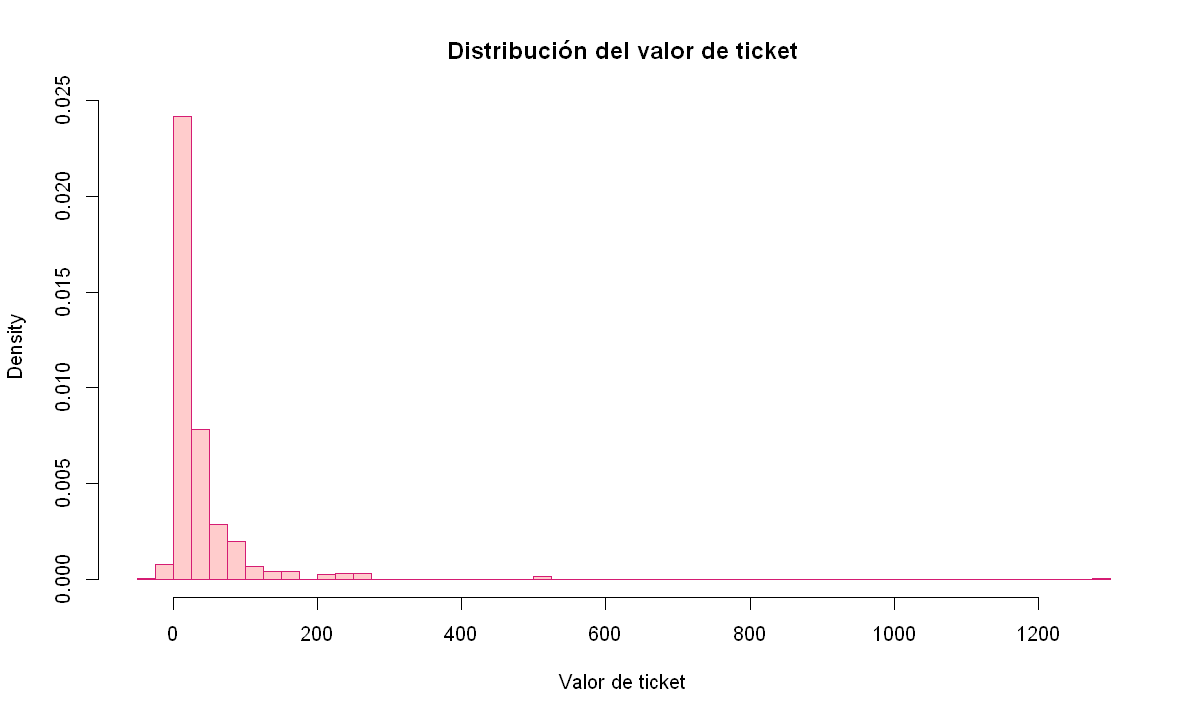

In [17]:
hist(myTitanicDataSet$Fare,
     main = "Distribución del valor de ticket",
     xlab = "Valor de ticket",
     col = rgb(1,0,0,0.2),
     border = "#D51C73",
     prob = T, #En este punto indicamos que buscamos conocer la distribución de probablidades y no la de frecuencias
     breaks = seq(-50,1300,25)
    )

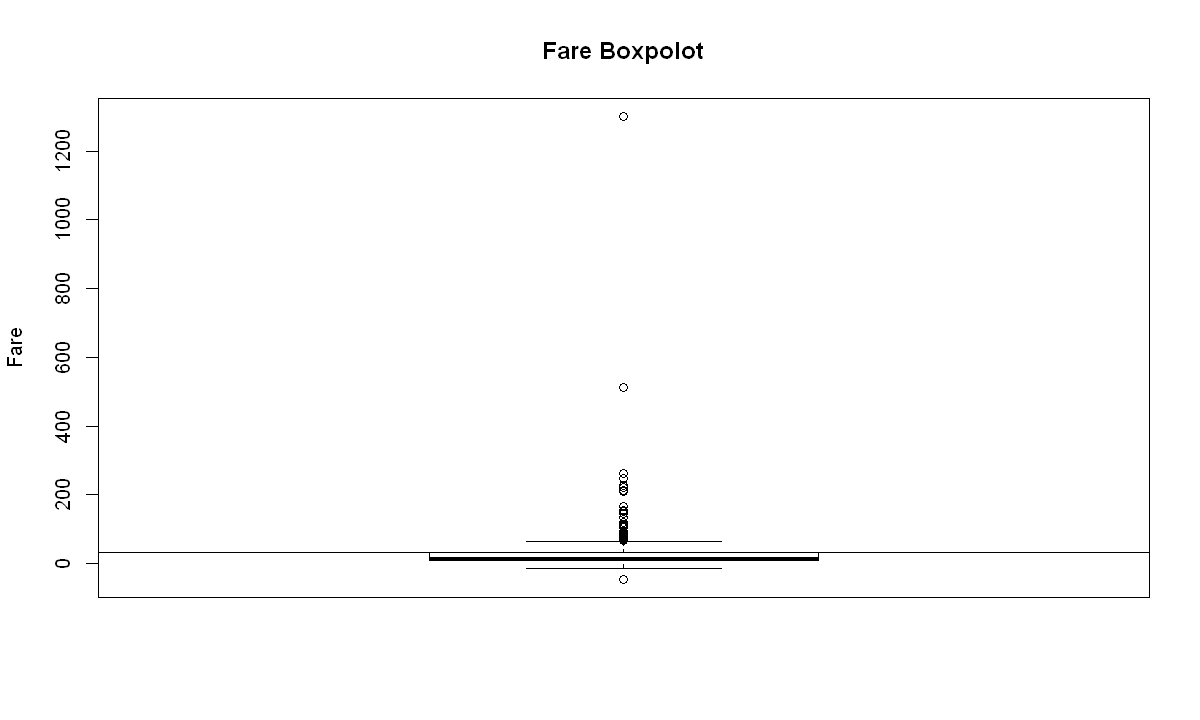

In [18]:
boxplot(myTitanicDataSet$Fare
        ,ylab='Fare'
        ,main='Fare Boxpolot')
abline(h=mean(myTitanicDataSet$Fare
              ,na.rm=T))

Podemos apreciar claramente que hay dos tipos de instancias que podemos catalogar como outlayers:

- Valores de fare negativos: Es esto posible?
- Valores de fare muy altos: Hay 2 instancias con un valor demasiado alto

En este caso procedemos a retirarlos dado que hay muy pocas instancias con estos valores y rompen completamente la visualización

[1] "Summary de Fare:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.013   7.925  14.500  31.195  31.275 263.000 

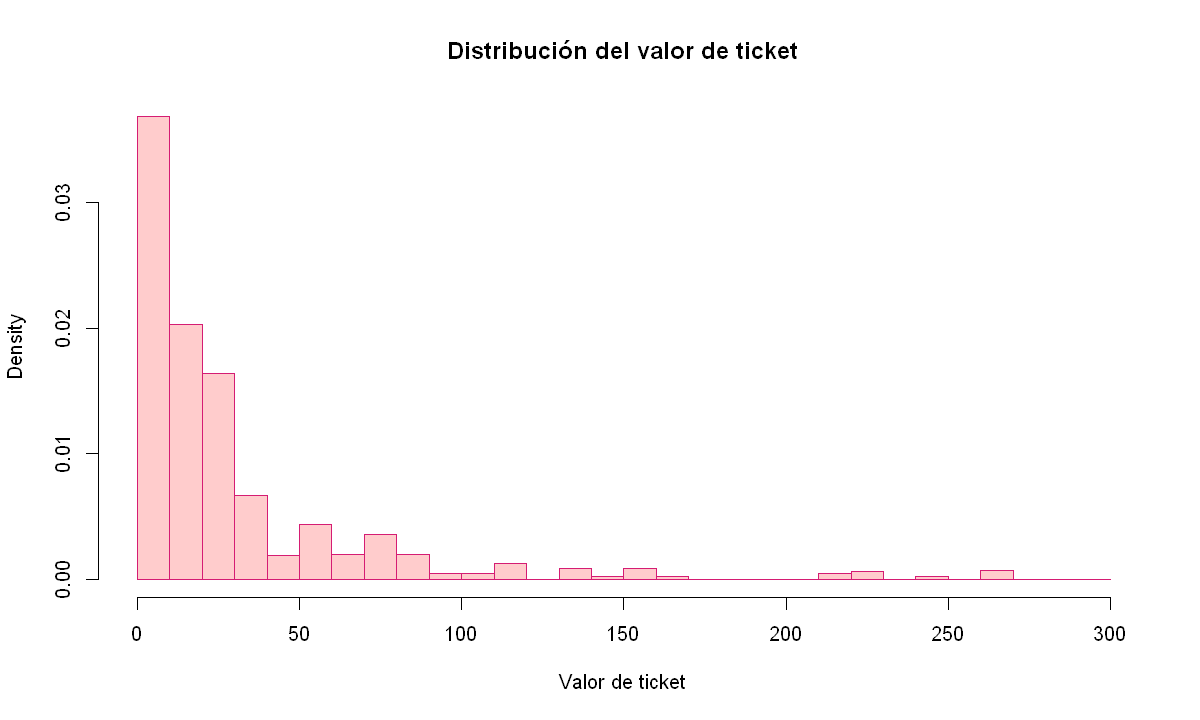

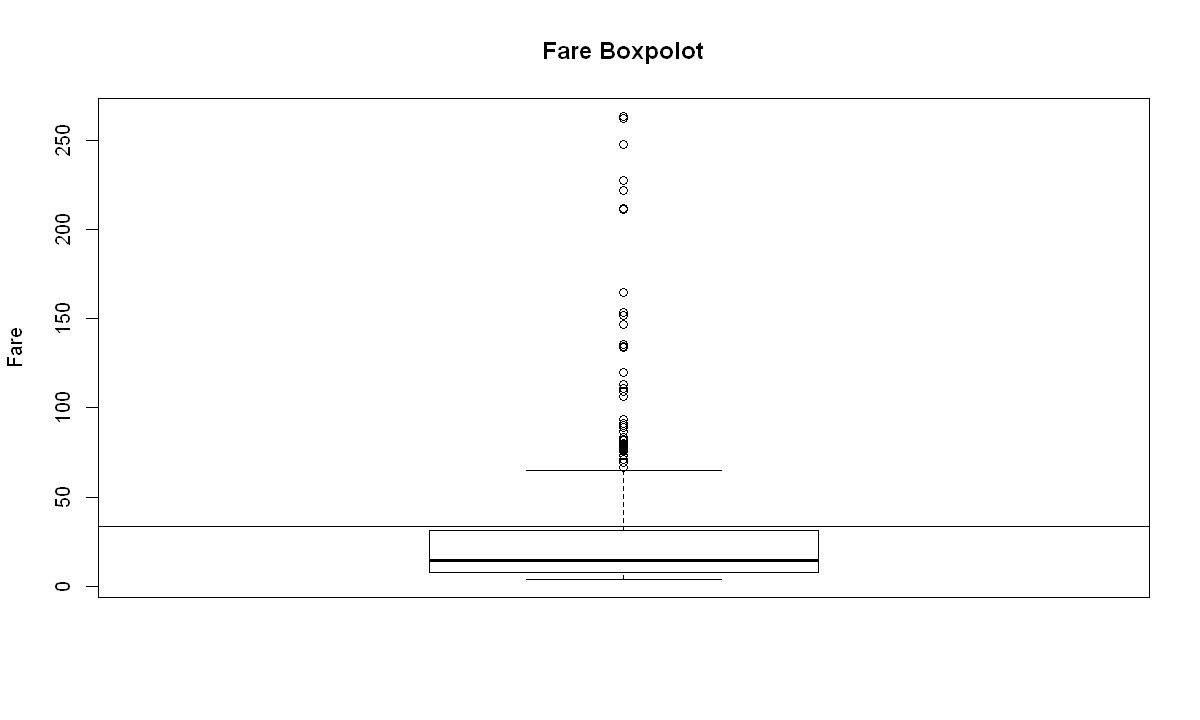

In [19]:
# Primero filtramos:
myTitanicDataSetFiltrado <- subset(myTitanicDataSet, Fare > 0)
myTitanicDataSetFiltrado <- subset(myTitanicDataSetFiltrado, Fare < 300)

# Summary
print("Summary de Fare:")
summary(myTitanicDataSetFiltrado$Fare)

# Histograma
hist(myTitanicDataSetFiltrado$Fare,
     main = "Distribución del valor de ticket",
     xlab = "Valor de ticket",
     col = rgb(1,0,0,0.2),
     border = "#D51C73",
     prob = T, #En este punto indicamos que buscamos conocer la distribución de probablidades y no la de frecuencias
     breaks = seq(0,300,10)
    )


# Boxplot
boxplot(myTitanicDataSetFiltrado$Fare
        ,ylab='Fare'
        ,main='Fare Boxpolot')
abline(h=mean(myTitanicDataSet$Fare
              ,na.rm=T))

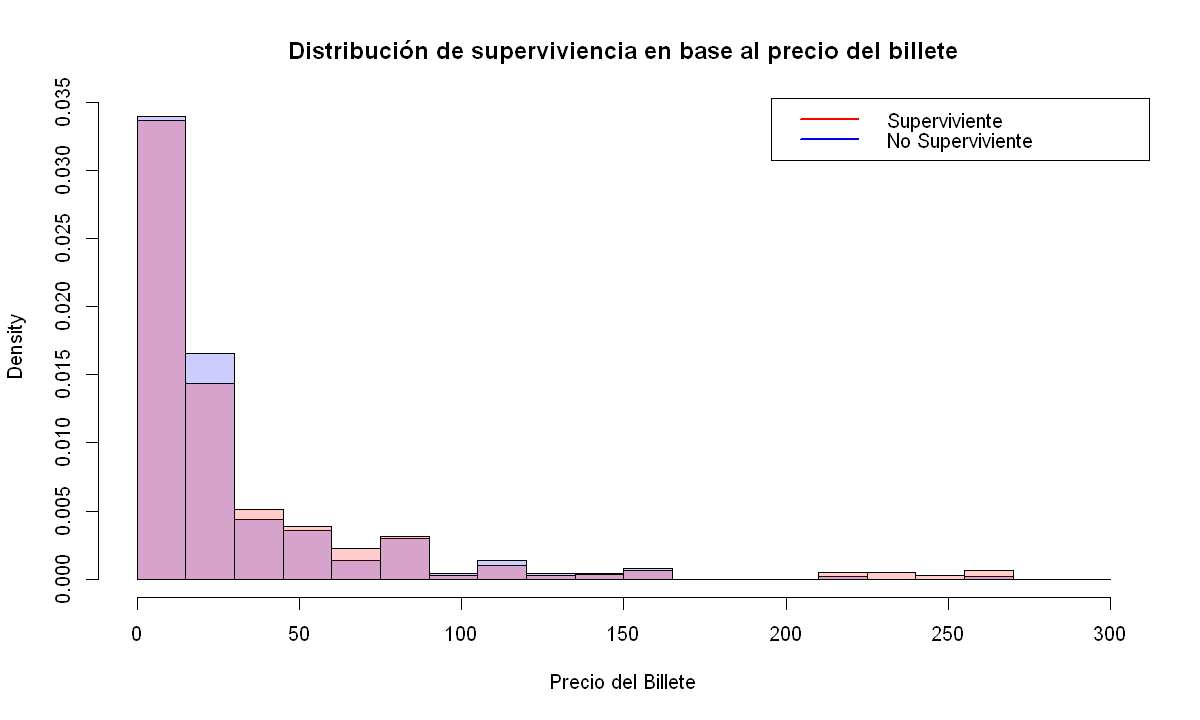

In [20]:
# Aproximación lineal de las curvas de densidad
hist(myTitanicDataSetFiltrado[myTitanicDataSet$Survived == 1,]$Fare
     , col = rgb(0,0,1,0.2)
     , prob = T #En este punto indicamos que buscamos conocer la distribución de probablidades y no la de frecuencias
     , breaks = seq(0,300,15)
     , main = "Distribución de superviviencia en base al precio del billete"
     , xlab = "Precio del Billete",)

hist(myTitanicDataSetFiltrado[myTitanicDataSet$Survived == 0,]$Fare
     , col = rgb(1,0,0,0.2)
     , prob = T #En este punto indicamos que buscamos conocer la distribución de probablidades y no la de frecuencias
     , breaks = seq(0,300,15)
     , add = T)

# Añadimos una leyenda para entender cada distribución
legend("topright"
       , c("Superviviente", "No Superviviente")
       , col = c(rgb(1,0,0), rgb(0,0,1))
       , lwd=2)

Si bien apreciamos una ligera diferencia en las distribuciones superiores nos encontramos con que a nivel medio hay una gran diferencia entre la probabilidad de supervivencia en función del precio del ticket:

In [39]:
myTitanicDataSetFiltrado  %>% 
    group_by(Survived)  %>% 
    summarize(passengers = n(), average_fare = mean(Fare), median_fare = quantile(Fare, probs = 0.5))

Survived,passengers,average_fare,median_fare
<int>,<int>,<dbl>,<dbl>
0,531,22.77659,10.5
1,338,44.42083,26.0


<b>6. Datos faltantes:</b> una gran parte de la preparación de datos se trata de valores perdidos en su conjunto de datos. Hay varios trucos que puede aplicar para manejar los valores faltantes que se enumeran a continuación:

<b>1.</b> Puede eliminar los valores faltantes (solo si tiene una buena razón, por ejemplo, el número de valores desconocidos en una observación / fila es tan alto que los datos parecen inutilizables).

<b>2.</b> Puede usar medidas de tendencia central (media, moda, mediana) para completar los valores faltantes. Debe pensar cuidadosamente sobre esto, ya que esto puede tener consecuencias indeseables para las variables con valores atípicos.

<b>3.</b> Use similitud entre casos. Aquí puede agrupar observaciones relacionadas y luego usar las medidas de tendencia central para inferir los valores faltantes.

<b>4.</b> Use ecuaciones para calcular valores perdidos basados en correlaciones. Un ejemplo de esto es usar la regresión lineal para inferir los valores faltantes de "Fare" en el conjunto de datos Titanic como se muestra en el siguiente ejemplo. El primer paso es identificar una columna que esté correlacionada con la que está intentando llenar. Como mostramos en el paso de correlación, "Fare" y "Pclass" están correlacionadas. Usaremos "Pclass" como nuestra variable independiente en el modelo de regresión de la siguiente manera:

In [22]:
myTitanicDataSetFiltrado  %>% 
    group_by(Pclass)  %>% 
    summarize(passengers = n()
              , average_fare = mean(Fare)
              , median_fare = quantile(Fare, probs = 0.5))

Pclass,passengers,average_fare,median_fare
<int>,<int>,<dbl>,<dbl>
0,2,10.38750,10.38750
1,204,80.28480,61.67920
2,173,21.59735,15.75000
3,474,13.90316,8.05000
NA,16,23.95599,8.65835


In [23]:
# Generamos un modelo con las instancias con valores conocidos
clean_fares <- myTitanicDataSetFiltrado[myTitanicDataSetFiltrado$Pclass %in% c(1, 2, 3),]

l <- glm(formula = Pclass ~ Fare
        , data = clean_fares)
print(l)
l$coefficients


Call:  glm(formula = Pclass ~ Fare, data = clean_fares)

Coefficients:
(Intercept)         Fare  
    2.70834     -0.01246  

Degrees of Freedom: 850 Total (i.e. Null);  849 Residual
Null Deviance:	    592.3 
Residual Deviance: 364.8 	AIC: 1700


(Intercept)        Fare 
 2.70833888 -0.01246216

In [24]:
# Model Predictions:
data.frame(round(predict(l),0)) %>% 
    group_by(round.predict.l...0.) %>% 
    summarize(n())

round.predict.l...0.,n()
<dbl>,<int>
-1,6
0,11
1,32
2,340
3,462


In [25]:
# Generamos una predicción de clases más correcta:
p <- ifelse(round(predict(l),0)<1,1,round(predict(l),0))
data.frame(p) %>% 
    group_by(p) %>% 
    summarize(n())

p,n()
<dbl>,<int>
1,49
2,340
3,462


In [26]:
library(caret)
confusionMatrix(
    as.factor(p)
    ,as.factor(clean_fares$Pclass))

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'caret'


The following object is masked from 'package:vegan':

    tolerance




Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1  49   0   0
         2 155  85 100
         3   0  88 374

Overall Statistics
                                          
               Accuracy : 0.5969          
                 95% CI : (0.5631, 0.6301)
    No Information Rate : 0.557           
    P-Value [Acc > NIR] : 0.01021         
                                          
                  Kappa : 0.3311          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity           0.24020  0.49133   0.7890
Specificity           1.00000  0.62389   0.7666
Pos Pred Value        1.00000  0.25000   0.8095
Neg Pred Value        0.80673  0.82779   0.7429
Prevalence            0.23972  0.20329   0.5570
Detection Rate        0.05758  0.09988   0.4395
Detection Prevalence  0.05758  0.39953   0.5429
Balanced Accuracy     0.62010  0.55761   

In [27]:
na_class <- myTitanicDataSetFiltrado[!(myTitanicDataSetFiltrado$Pclass %in% c(1, 2, 3)),]
head(na_class)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
18,18,1,0,"Williams, Mr. Charles Eugene",,0,0,244373,13.0000,,S,Man,NA
23,23,1,NA,"McGowan, Miss. Anna ""Annie""",15,0,0,330923,8.0292,,Q,Woman,15
45,45,1,NA,"Devaney, Miss. Margaret Delia",19,0,0,330958,7.8792,,Q,Woman,19
104,104,0,NA,"Johansson, Mr. Gustaf Joel",33,0,0,7540,8.6542,,S,Man,33
111,111,0,NA,"Porter, Mr. Walter Chamberlain",47,0,0,110465,52.0000,C110,S,Man,47
133,133,0,NA,"Robins, Mrs. Alexander A (Grace Charity Laury)",47,1,0,A/5. 3337,14.5000,,S,Woman,47


Con estas instancias generamos nuestras predicciones:

In [28]:
head(round(predict(l, newdata = data.frame(Fare = na_class$Fare)),0))

1 2 3 4 5 6 
3 3 3 3 2 3

In [29]:
na_class $ pred_Pclass <-round(predict(l, newdata = data.frame(Fare = na_class$Fare)),0)
head(na_class)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
18,18,1,0,"Williams, Mr. Charles Eugene",,0,0,244373,13.0000,,S,Man,NA,3
23,23,1,NA,"McGowan, Miss. Anna ""Annie""",15,0,0,330923,8.0292,,Q,Woman,15,3
45,45,1,NA,"Devaney, Miss. Margaret Delia",19,0,0,330958,7.8792,,Q,Woman,19,3
104,104,0,NA,"Johansson, Mr. Gustaf Joel",33,0,0,7540,8.6542,,S,Man,33,3
111,111,0,NA,"Porter, Mr. Walter Chamberlain",47,0,0,110465,52.0000,C110,S,Man,47,2
133,133,0,NA,"Robins, Mrs. Alexander A (Grace Charity Laury)",47,1,0,A/5. 3337,14.5000,,S,Woman,47,3


In [30]:
myTitanicDataSet <- myTitanicDataSet %>% 
    left_join((na_class %>% select(PassengerId, pred_Pclass)), by = "PassengerId")

myTitanicDataSet$Pclass <- ifelse(is.na(myTitanicDataSet$pred_Pclass)
                                  , myTitanicDataSet$Pclass
                                  , myTitanicDataSet$pred_Pclass)

head(myTitanicDataSet)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass
,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22,NA
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38,NA
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26,NA
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35,NA
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35,NA
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA,NA


<b>7. Normalización:</b> la normalización es una técnica utilizada para transformar escalas de variables medidas en diferentes escalas en una escala comparable o común. Puede tener la variable "Age" que va de 0 a 95 y otra variable "Ingresos" que va de 0 a 10 000 000.
Estas escalas diferentes pueden tener un efecto negativo en el rendimiento de su modelo, pero al usar la normalización, estas variables se pueden transformar en una escala de valores entre 0 y 1.

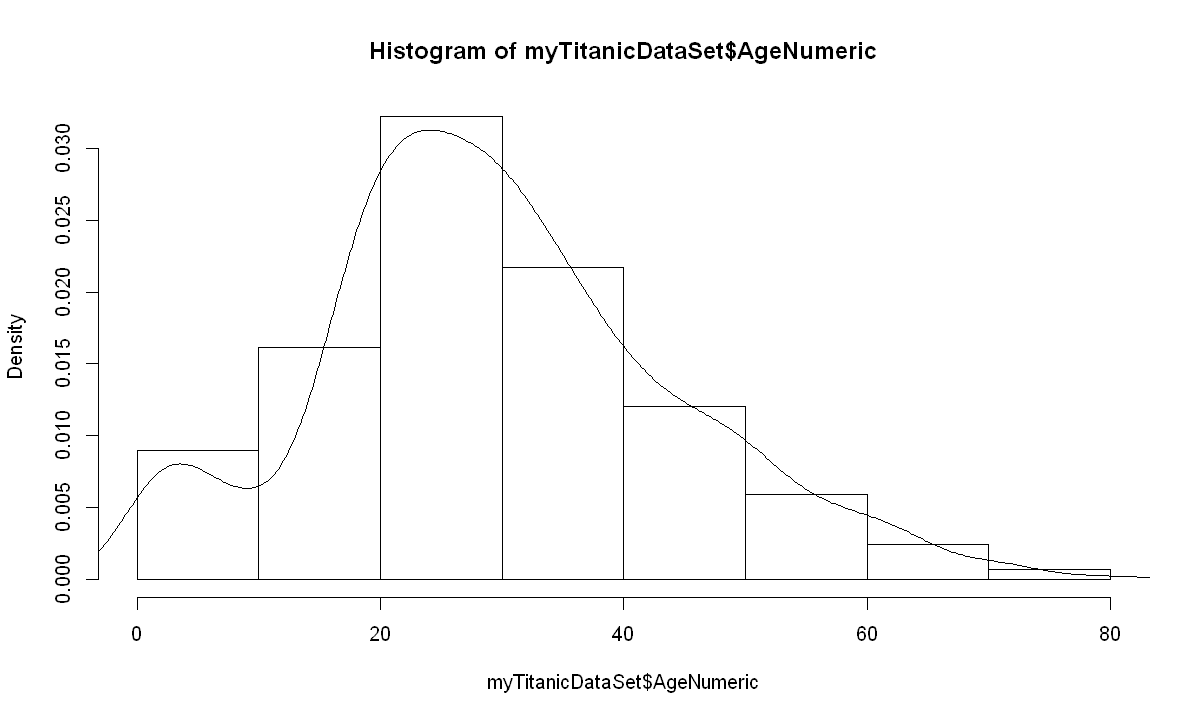

In [31]:
hist(myTitanicDataSet$AgeNumeric,prob=T)
lines(density(myTitanicDataSet$AgeNumeric,na.rm=T))
#adds smooth line and DROP NA's

In [32]:
myTitanicDataSet$AgeNormalised <- decostand(x=myTitanicDataSet$AgeNumeric,"normalize", 2, na.rm=TRUE)
head(myTitanicDataSet,20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass,AgeNormalised
,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22,NA,0.024906399
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38,NA,0.043020144
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26,NA,0.029434836
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35,NA,0.039623817
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35,NA,0.039623817
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA,NA,NA
7,7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,Man,54,NA,0.061133889
8,8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,Man,2,NA,0.002264218
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,,S,Woman,27,NA,0.030566945


Como se puede ver en la salida anterior, la columna normalizada resultante tiene valores entre 0-1. El inconveniente de la normalización es que se pierden los valores atípicos ya que todo se ajusta a pequeña escala. La respuesta a esto es la estandarización que se explica a continuación.

<b>8. Estandarización:</b> Habrá momentos en los que se desee normalizar sus variables pero aún así mantener las ponderaciones de cada valor individual, incluidos los valores atípicos, en estas circunstancias es preferible utilizar la estandarización. La estandarización transformará su variable para que tenga una media cero y variación de unidad / desviación estándar.

In [36]:
myTitanicDataSet$AgeStandardised <- scale(myTitanicDataSet[,"AgeNormalised"])
head(myTitanicDataSet,10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass,AgeNormalised,AgeStandardised,AgeBracket
,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<fct>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22,NA,0.024906399,-0.5300051,Infant
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38,NA,0.043020144,0.5714304,Infant
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26,NA,0.029434836,-0.2546462,Infant
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35,NA,0.039623817,0.3649113,Infant
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35,NA,0.039623817,0.3649113,Infant
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA,NA,NA,NA,NA
7,7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,Man,54,NA,0.061133889,1.6728659,Infant
8,8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,Man,2,NA,0.002264218,-1.9067995,Infant
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,,S,Woman,27,NA,0.030566945,-0.1858065,Infant


Del resultado resultante se puede ver que la variable Age estandarizada ahora está en una escala nueva y más pequeña en comparación con la escala de variables original.

<b>9. Discretización / Agrupación:</b> Como se puede ver arriba, el resultado es una nueva columna que tiene diferentes categorías para la variable Age. Hay otras formas de diferenciar sus variables, como usar intervalos de frecuencia iguales o intervalos de longitud iguales.

In [35]:
myTitanicDataSet$AgeBracket <- as.factor(
    ifelse(myTitanicDataSet$AgeNormalised<=3,'Infant', 
    ifelse(myTitanicDataSet$AgeNormalised>3 & myTitanicDataSet$AgeNormalised<=12,'Child', 
    ifelse(myTitanicDataSet$AgeNormalised>12 & myTitanicDataSet$AgeNormalised<=19,'Teenager',
    ifelse(myTitanicDataSet$AgeNormalised>20 & myTitanicDataSet$AgeNormalised<=35,'Young Adult',
    ifelse(myTitanicDataSet$AgeNormalised>35 & myTitanicDataSet$AgeNormalised<=45,'Middle Age', 'Elderly'))))))

head(myTitanicDataSet,10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex,AgeNumeric,pred_Pclass,AgeNormalised,AgeStandardised,AgeBracket
,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<fct>
1,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,Man,22,NA,0.024906399,-0.5300051,Infant
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38,1,0,PC 17599,71.2833,C85,C,Woman,38,NA,0.043020144,0.5714304,Infant
3,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,,S,Woman,26,NA,0.029434836,-0.2546462,Infant
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,S,Woman,35,NA,0.039623817,0.3649113,Infant
5,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,Man,35,NA,0.039623817,0.3649113,Infant
6,6,0,3,"Moran, Mr. James",,0,0,330877,8.4583,,Q,Man,NA,NA,NA,NA,NA
7,7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,Man,54,NA,0.061133889,1.6728659,Infant
8,8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,Man,2,NA,0.002264218,-1.9067995,Infant
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,,S,Woman,27,NA,0.030566945,-0.1858065,Infant
